# Data Distribution   
Apply TSNE to reduce data dimensions to only 2 and visulize data

Packages 

In [3]:
import os
#Change current directory
os.chdir ('/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn')
#Check the current directory
os.getcwd()

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

from src.eda import utils
from src.eda.utils import columnsFamilies

#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
x_y_sets_path = "data/x_y_sets"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

### Loding data

--------------------

In [4]:
#Loading data
data_date = "2024-10-17"
x_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_train.csv", index_col = 0)
x_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_dev.csv", index_col = 0)
x_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_test.csv", index_col = 0)
y_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_train.csv", index_col = 0)
y_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_dev.csv", index_col = 0)
y_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_test.csv", index_col = 0)

print (f"x_train shape : {x_train.shape}")
print (f"x_dev shape : {x_dev.shape}")
print (f"x_test shape : {x_test.shape}")
print (f"y_train shape : {y_train.shape}")
print (f"y_dev shape : {y_dev.shape}")
print (f"y_test shape : {y_test.shape}")

x_train shape : (86992, 531)
x_dev shape : (14563, 531)
x_test shape : (5839, 531)
y_train shape : (86992, 1)
y_dev shape : (14563, 1)
y_test shape : (5839, 1)


-------------------

### Apply T-SNE for visualization

**df_train**

Applying tsne on data
Ploting data distribution


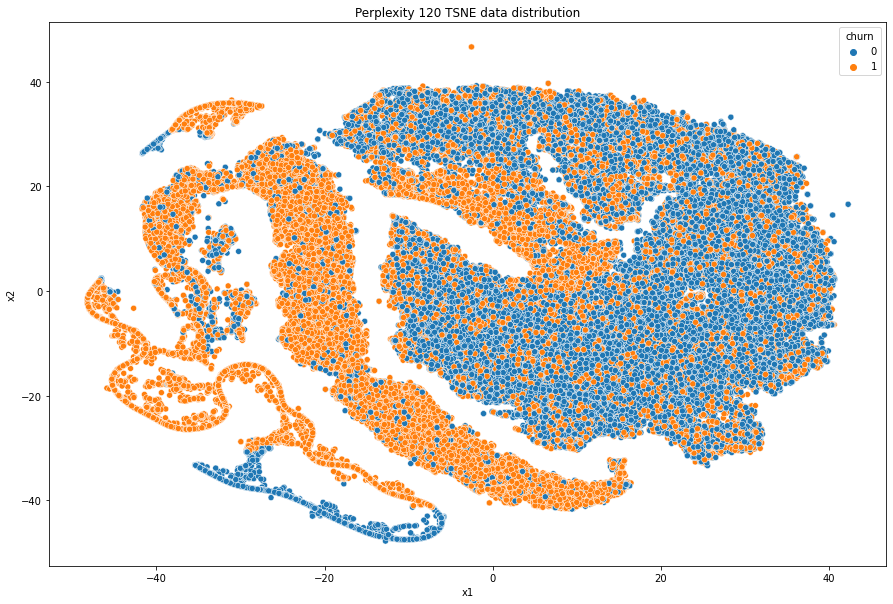

Applying tsne on data
Ploting data distribution


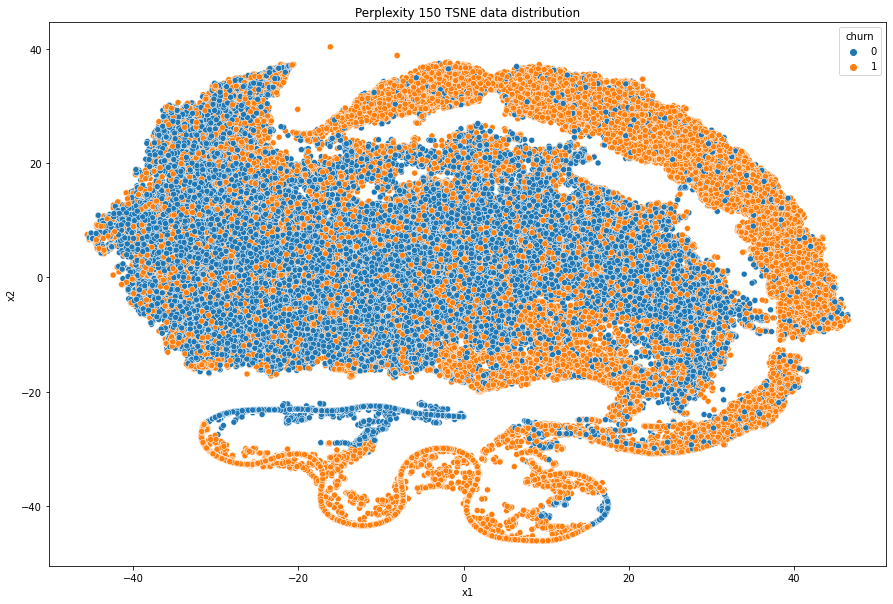

In [17]:
list_of_perplexities = [30, 50, 90, 120, 150]
for perp in list_of_perplexities:
    utils.vis_tsne_data_distribution(x_train, y_train["churn"], perplexity = perp)

### PCA

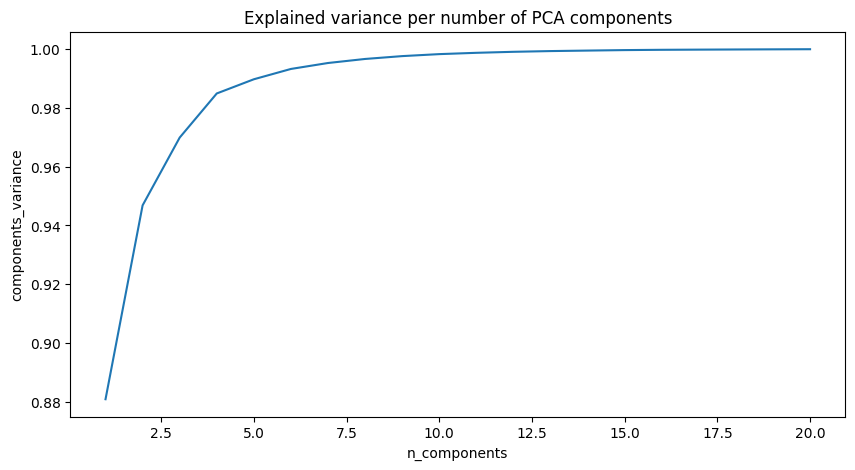

In [9]:
#Compute explainable variance per n_components
pca_variance = {"n_components": [], "components_variance": [] }
for n_components in range(1,21):
    pca = PCA(n_components = n_components)
    pca.fit(x_train)
    components_variance = pca.explained_variance_ratio_.sum()
    pca_variance["n_components"].append(n_components)
    pca_variance["components_variance"].append(components_variance)
pca_variance = pd.DataFrame(pca_variance)
#Plot PCA explained variance
plt.figure(figsize = (10, 5))
sns.lineplot(data = pca_variance, x="n_components", y="components_variance")
plt.title ("Explained variance per number of PCA components")
plt.show()

#### PCA for vis

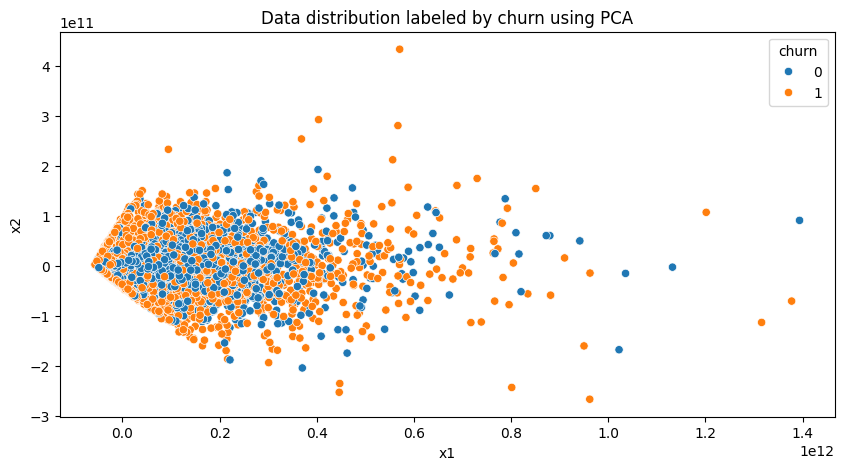

In [10]:
#PCA fit transform data
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)

#TO DATAFRAME
x_train_pca = pd.DataFrame(x_train_pca, columns=["x1", "x2"])
x_train_pca["churn"] = y_train["churn"]
x_train_pca.head()

plt.figure(figsize=(10, 5))
sns.scatterplot(data = x_train_pca, x =  "x1", y="x2", hue="churn")
plt.title("Data distribution labeled by churn using PCA")
plt.show()